# 1.3.2 Arithmetic Operations on Images

In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [45]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y)) # 250+10 = 260 => 255
print(x+y)

[[255]]
[4]


In [46]:
img1 = cv2.imread('img3.png')
img2 = cv2.imread('img4.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
cv2.imshow('img',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
img1 = cv2.imread('img3.png')
img2 = cv2.imread('img4.png')

w = 0.5
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
w=0.5
cv2.namedWindow('image')
cv2.createTrackbar('Blend','image',0,255,lambda x: None)

while True:
    if cv2.waitKey(1) & 0xFF == 27:
        break
    
    blend = cv2.getTrackbarPos('Blend','image')
    
    a=blend/255.0
    b=1-a
    
    img1 = cv2.imread('img3.png')
    img2 = cv2.imread('img4.png')
    dst = cv2.addWeighted(img1,a,img2,b,0)
    
    cv2.imshow('image',dst)
    
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [5]:
def nothing(x):
    pass
img1 = cv2.imread('img3.png')
img2 = cv2.imread('img4.png')
cv2.namedWindow('image')

cv2.createTrackbar('weight', 'image', 0, 255, nothing)
while(1):
    k=cv2.waitKey(1) & 0xFF
    if k == 27:
        break
       
    weight = cv2.getTrackbarPos('weight', 'image')
    dst = cv2.addWeighted(img1, weight/255, img2, 1-weight/255, 0)
    cv2.imshow('image',dst)
    
cv2.destroyAllwindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\highgui\src\window_w32.cpp:2577: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [23]:
def pltImage(img):
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show
    

In [ ]:
# 흑백으로 출력하는 함수
def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [24]:
img1 = cv2.imread('sea.png')
img2 = cv2.imread('aiera.png')

In [25]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(rows, cols, channels)

300 400 3


In [26]:
roi = img1[0:rows, 0:cols ]

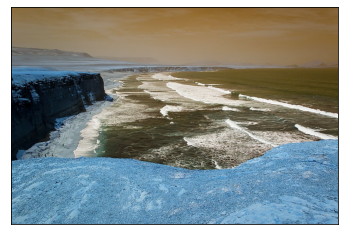

In [27]:
pltImage(img1)

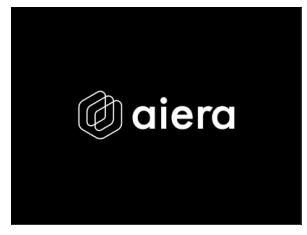

In [28]:
pltImage(img2)

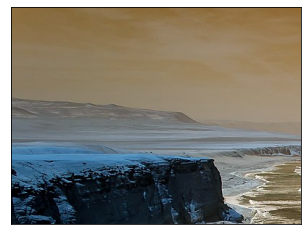

In [29]:
pltImage(roi)

In [30]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

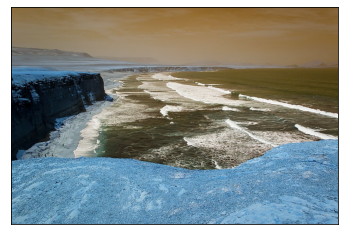

In [31]:
pltImage(img1)

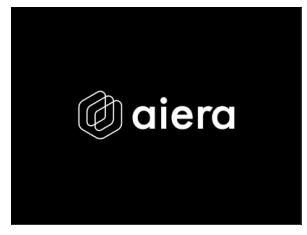

In [32]:
pltImage(img2)

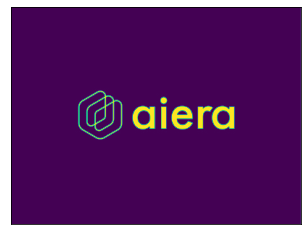

In [33]:
pltImage(img2gray)

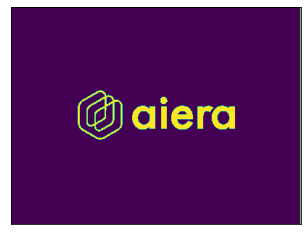

In [36]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
#black = 0, white = 255
pltImage(mask)

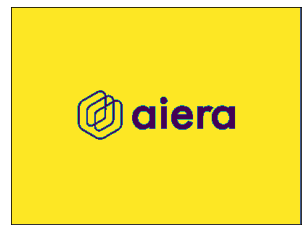

In [37]:
#black > white, white > black
mask_inv = cv2.bitwise_not(mask)
pltImage(mask_inv)

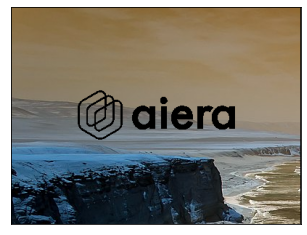

In [38]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
pltImage(img1_bg)

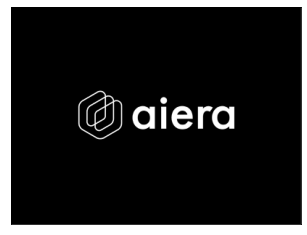

In [39]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
pltImage(img2_fg)

In [40]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)

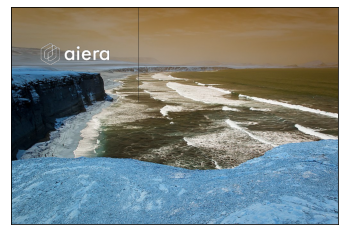

In [43]:
img1[0:rows, 0:cols ] = dst
pltImage(img1)

In [42]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
def pltImage(img):
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show